In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset
census = pd.read_csv('datasets/census/census.csv')

In [3]:
divisions = pd.read_csv('datasets/census/census-divisions.csv')

In [4]:
#merge dataset leftjoin
census = census.merge(divisions, how = 'left')

In [5]:
#sort values by region, division and population
census_sorted = census.sort_values(by=['region','division','population'], ascending = [True, True, False])

In [6]:
#write data to excel
census_sorted.to_excel('output/census-sorted-output.xlsx')

In [7]:
census.head()

,state,year,population,land_area,postal_code,region,division
0,Alabama,2010,4785437,52420,AL,South,East South Central
1,Alabama,2011,4799069,52420,AL,South,East South Central
2,Alabama,2012,4815588,52420,AL,South,East South Central
3,Alabama,2013,4830081,52420,AL,South,East South Central
4,Alabama,2014,4841799,52420,AL,South,East South Central


In [8]:
#drop the postal code column
census = census.drop('postal_code', axis = 1)

In [9]:
#create a calculated column
census['new column'] = census['population'] / census['land_area']

In [10]:
#rename calculated column to density
census = census.rename(columns = {'new column': 'density'})

In [11]:
census.head()

,state,year,population,land_area,region,division,density
0,Alabama,2010,4785437,52420,South,East South Central,91.290290
1,Alabama,2011,4799069,52420,South,East South Central,91.550343
2,Alabama,2012,4815588,52420,South,East South Central,91.865471
3,Alabama,2013,4830081,52420,South,East South Central,92.141950
4,Alabama,2014,4841799,52420,South,East South Central,92.365490


In [14]:
#filter out 2015 data
census_year = census['year'] == 2015

In [15]:
census_filtered = census[census_year]

In [17]:
census_filtered.head()

,state,year,population,land_area,region,division,density
5,Alabama,2015,4852347,52420,South,East South Central,92.566711
11,Alaska,2015,737498,665384,West,Pacific,1.108380
17,Arizona,2015,6829676,113990,West,Mountain,59.914694
23,Arkansas,2015,2978048,53179,South,West South Central,56.000451
29,California,2015,38918045,163695,West,Pacific,237.747304


Text(0.5, 1.0, 'land area versus population')

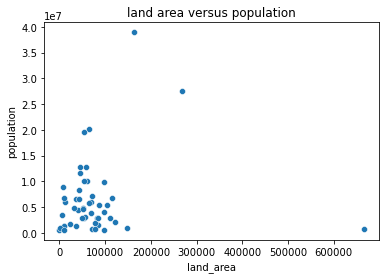

In [20]:
#visualize relationship between land area and population for 2015
sns.scatterplot(x='land_area', y='population', data = census_filtered)
plt.title('land area versus population')

In [22]:
#total population for each region 2015
census_filtered.groupby('region')[['population']].sum().head()

,population
region,
Midwest,67860583
Northeast,56034684
South,120997341
West,75742555


In [23]:
#pivot table 
census.pivot_table(index = 'state', columns = 'year', values = 'population').reset_index()

year,state,2010,2011,2012,2013,2014,2015
0,Alabama,4785437,4799069,4815588,4830081,4841799,4852347
1,Alaska,713910,722128,730443,737068,736283,737498
2,Arizona,6407172,6472643,6554978,6632764,6730413,6829676
3,Arkansas,2921964,2940667,2952164,2959400,2967392,2978048
4,California,37319502,37638369,37948800,38260787,38596972,38918045
5,Colorado,5047349,5121108,5192647,5269035,5350101,5450623
6,Connecticut,3579114,3588283,3594547,3594841,3594524,3587122
7,Delaware,899593,907381,915179,923576,932487,941252
8,District of Columbia,605226,619800,634924,650581,662328,675400
9,Florida,18845537,19053237,19297822,19545621,19845911,20209042
